In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
image = cv2.cvtColor(cv2.imread('lena.png'), cv2.COLOR_BGR2RGB)

In [3]:
def apply_convolution(image, kernel):
    return apply_correlation(image, kernel[::-1, ::-1])

def apply_correlation(image, kernel):
    image = image.astype(np.float32)
    kernel = kernel.astype(np.float32)
    (h, w, c) = image.shape
    (kh, kw) = kernel.shape

    pad_h = kh // 2
    pad_w = kw // 2
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w), (0, 0)), mode='constant', constant_values=0)
    
    convolved_image = np.zeros_like(image)
    
    for channel in range(c):
        for i in range(h):
            for j in range(w):
                region = padded_image[i:i + kh, j:j + kw, channel]
                convolved_value = np.sum(region * kernel)
                convolved_image[i, j, channel] = convolved_value

    convolved_image = np.clip(convolved_image, 0, 255).astype(np.uint8)
    
    return convolved_image

def apply_median(image, size):
    image = image.astype(np.float32)
    (h, w, c) = image.shape
    (kh, kw) = (size, size)

    pad_h = kh // 2
    pad_w = kw // 2
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w), (0, 0)), mode='constant', constant_values=-1)
    
    median_image = np.zeros_like(image)
    
    for channel in range(c):
        for i in range(h):
            for j in range(w):
                region = padded_image[i:i + kh, j:j + kw, channel]
                region_valid = np.sort(region[region != -1])
                median_image[i, j, channel] = region_valid[len(region_valid) // 2]

    median_image = np.clip(median_image, 0, 255).astype(np.uint8)
    
    return median_image

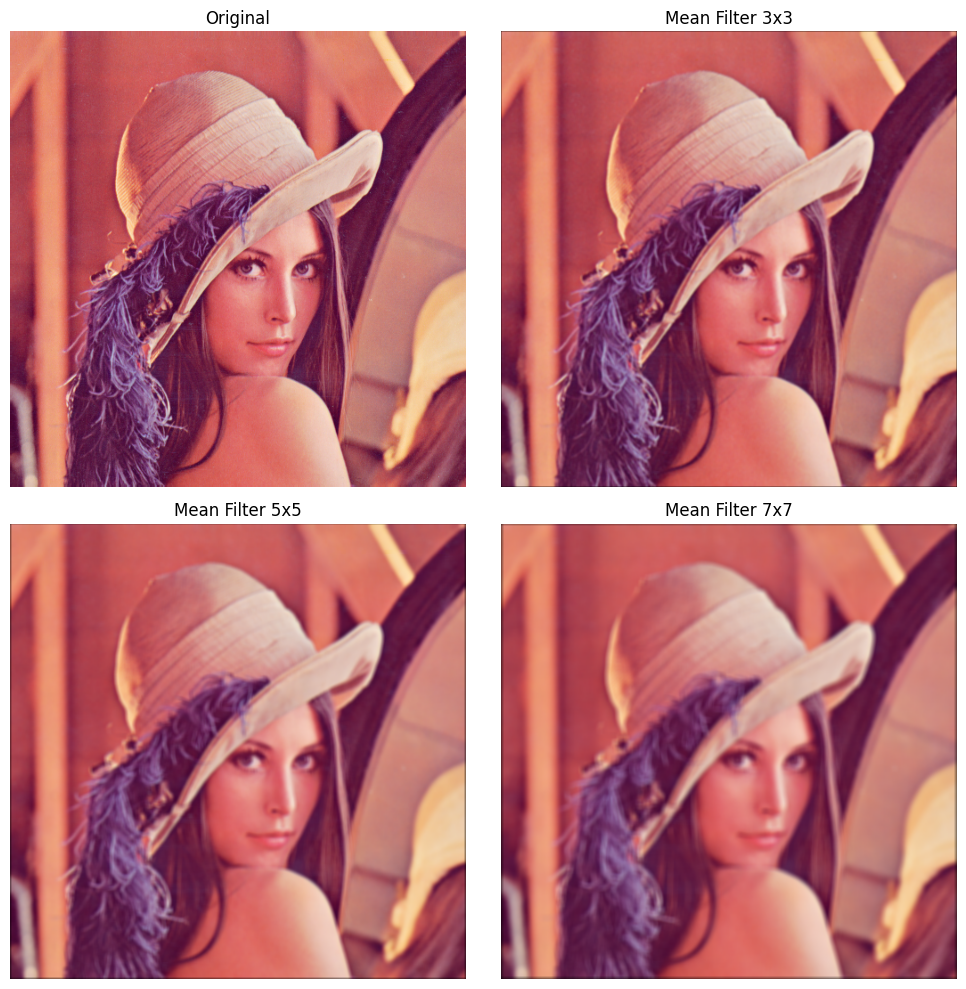

In [4]:
def mean_kernel(size):
    return np.ones((size, size)) / (size ** 2)

images = [image, apply_convolution(image, mean_kernel(3)), apply_convolution(image, mean_kernel(5)), apply_convolution(image, mean_kernel(7))]
titles = ["Original", "Mean Filter 3x3", "Mean Filter 5x5", "Mean Filter 7x7"] 

rows = 2
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

axes = axes.flatten()

for i, (ax, title) in enumerate(zip(axes, titles)):
    ax.imshow(images[i])
    ax.set_title(title, fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()

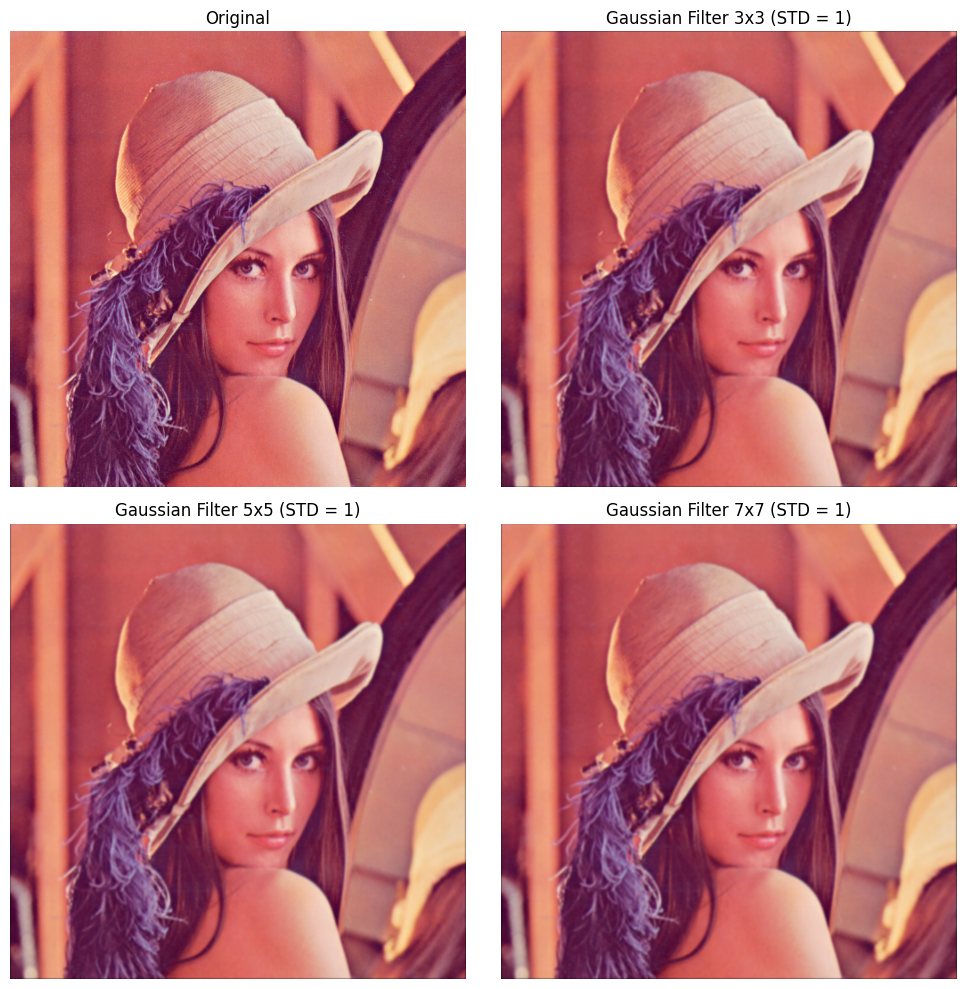

In [5]:
def gauss_kernel(size, sigma):
    kernel = np.zeros((size, size))
    center = size // 2
    sum_val = 0 

    for i in range(size):
        for j in range(size):
            x = i - center
            y = j - center
            kernel[i, j] = (1 / (2 * np.pi * sigma ** 2)) * np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))
            sum_val += kernel[i, j]

    kernel /= sum_val
    return kernel

images = [image, apply_convolution(image, gauss_kernel(3, 1)), apply_convolution(image, gauss_kernel(5, 1)), apply_convolution(image, gauss_kernel(7, 1))]
titles = ["Original", "Gaussian Filter 3x3 (STD = 1)", "Gaussian Filter 5x5 (STD = 1)", "Gaussian Filter 7x7 (STD = 1)"] 

rows = 2
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

axes = axes.flatten()

for i, (ax, title) in enumerate(zip(axes, titles)):
    ax.imshow(images[i])
    ax.set_title(title, fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()

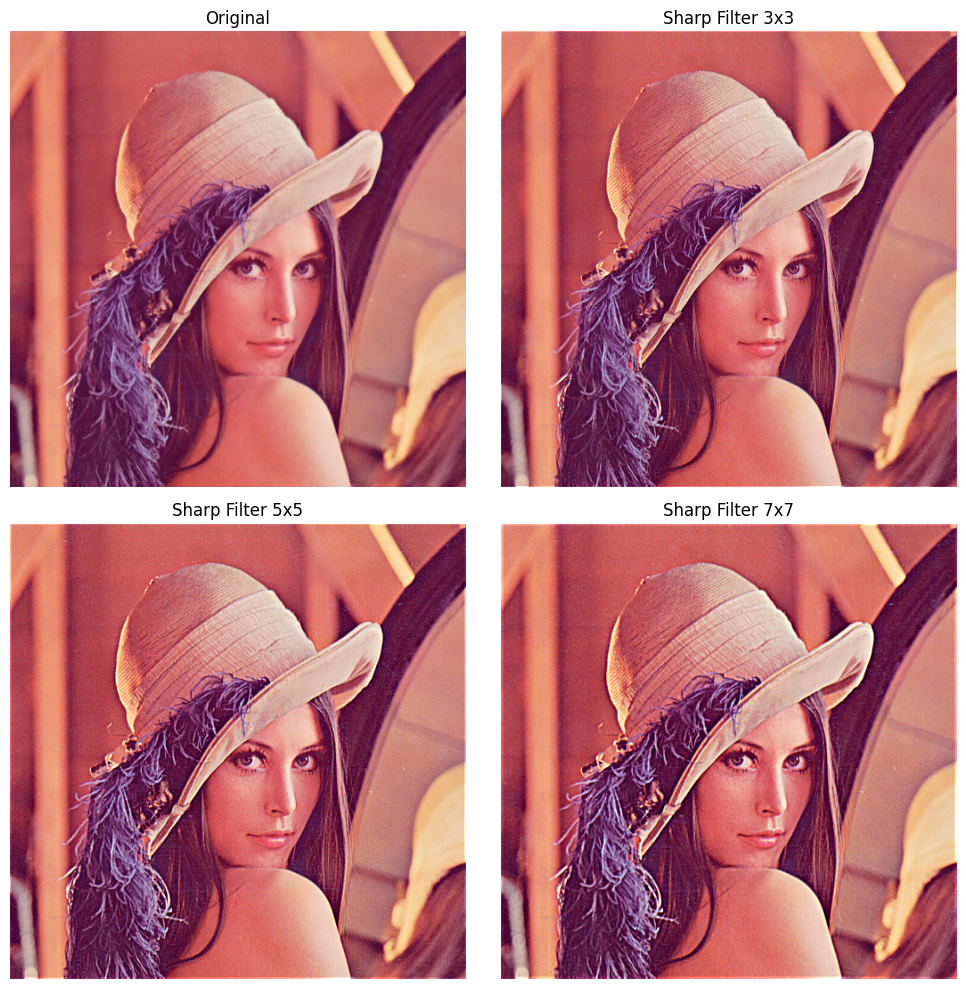

In [6]:
def I_kernel(size):
    k = np.zeros((size, size))
    k[size // 2, size // 2] = 1
    return k

def sharp_kernel(size):
    return I_kernel(size) + (I_kernel(size) - mean_kernel(size))

images = [image, apply_convolution(image, sharp_kernel(3)), apply_convolution(image, sharp_kernel(5)), apply_convolution(image, sharp_kernel(7))]
titles = ["Original", "Sharp Filter 3x3", "Sharp Filter 5x5", "Sharp Filter 7x7"] 

rows = 2
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

axes = axes.flatten()

for i, (ax, title) in enumerate(zip(axes, titles)):
    ax.imshow(images[i])
    ax.set_title(title, fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [7]:
image = cv2.cvtColor(cv2.imread('art.png'), cv2.COLOR_BGR2RGB)

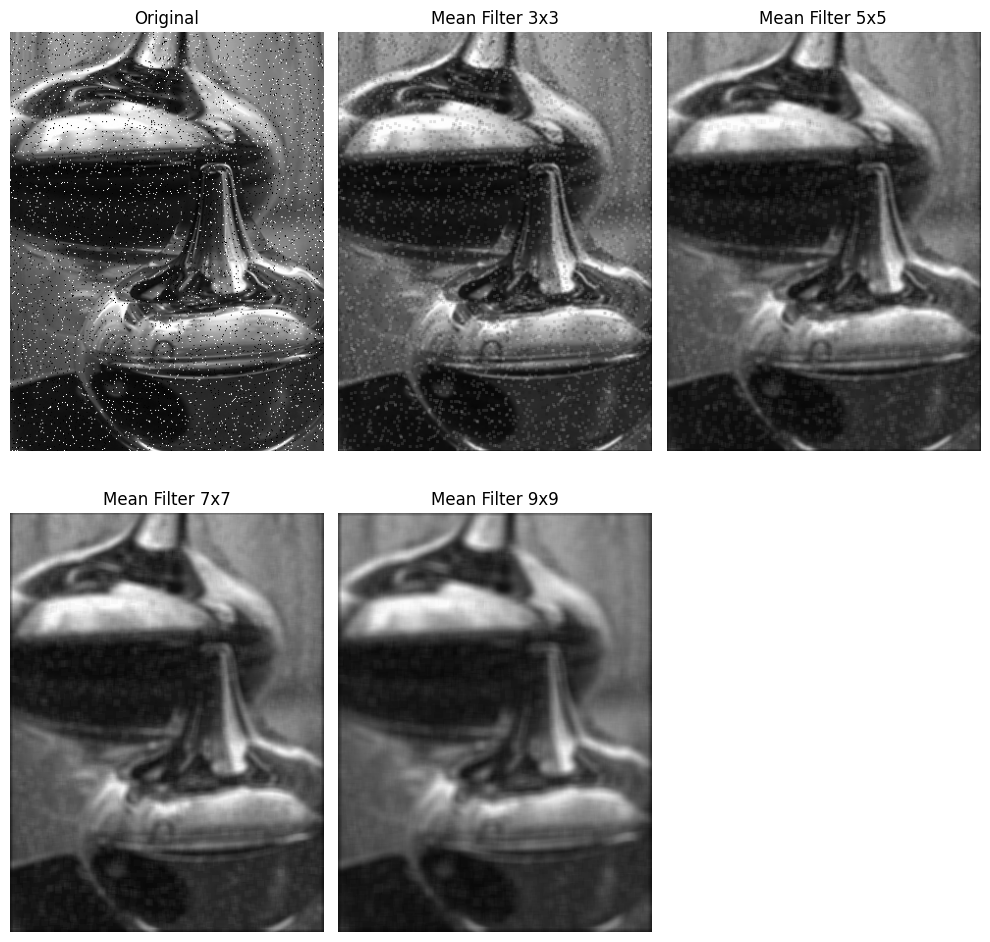

In [8]:
images = [image, apply_convolution(image, mean_kernel(3)), apply_convolution(image, mean_kernel(5)), apply_convolution(image, mean_kernel(7)), apply_convolution(image, mean_kernel(9))]
titles = ["Original", "Mean Filter 3x3", "Mean Filter 5x5", "Mean Filter 7x7", "Mean Filter 9x9"] 

rows = 2
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

axes = axes.flatten()
axes[-1].remove()

for i, (ax, title) in enumerate(zip(axes, titles)):
    ax.imshow(images[i])
    ax.set_title(title, fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()

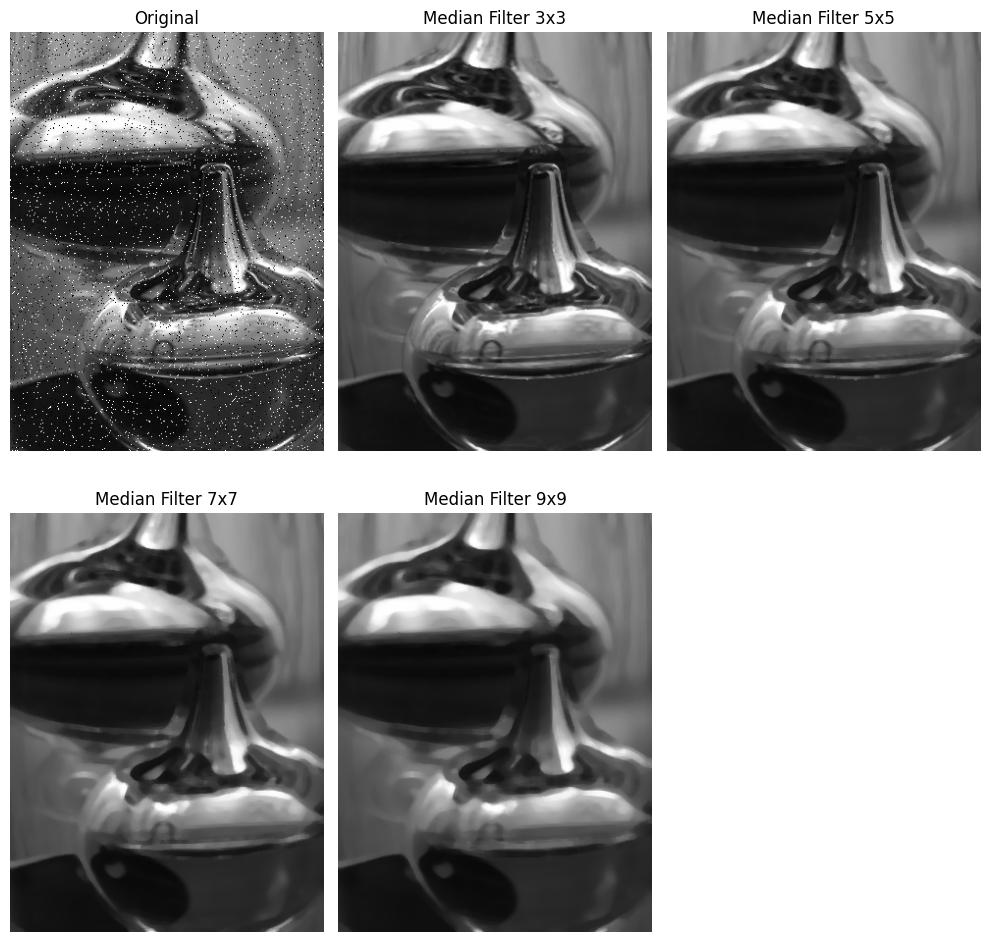

In [9]:
images = [image, apply_median(image,3), apply_median(image,5), apply_median(image,7), apply_median(image, 9)]
titles = ["Original", "Median Filter 3x3", "Median Filter 5x5", "Median Filter 7x7", "Median Filter 9x9"] 

rows = 2
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

axes = axes.flatten()
axes[-1].remove()

for i, (ax, title) in enumerate(zip(axes, titles)):
    ax.imshow(images[i])
    ax.set_title(title, fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [10]:
image = cv2.cvtColor(cv2.imread('lena.png'), cv2.COLOR_BGR2RGB)

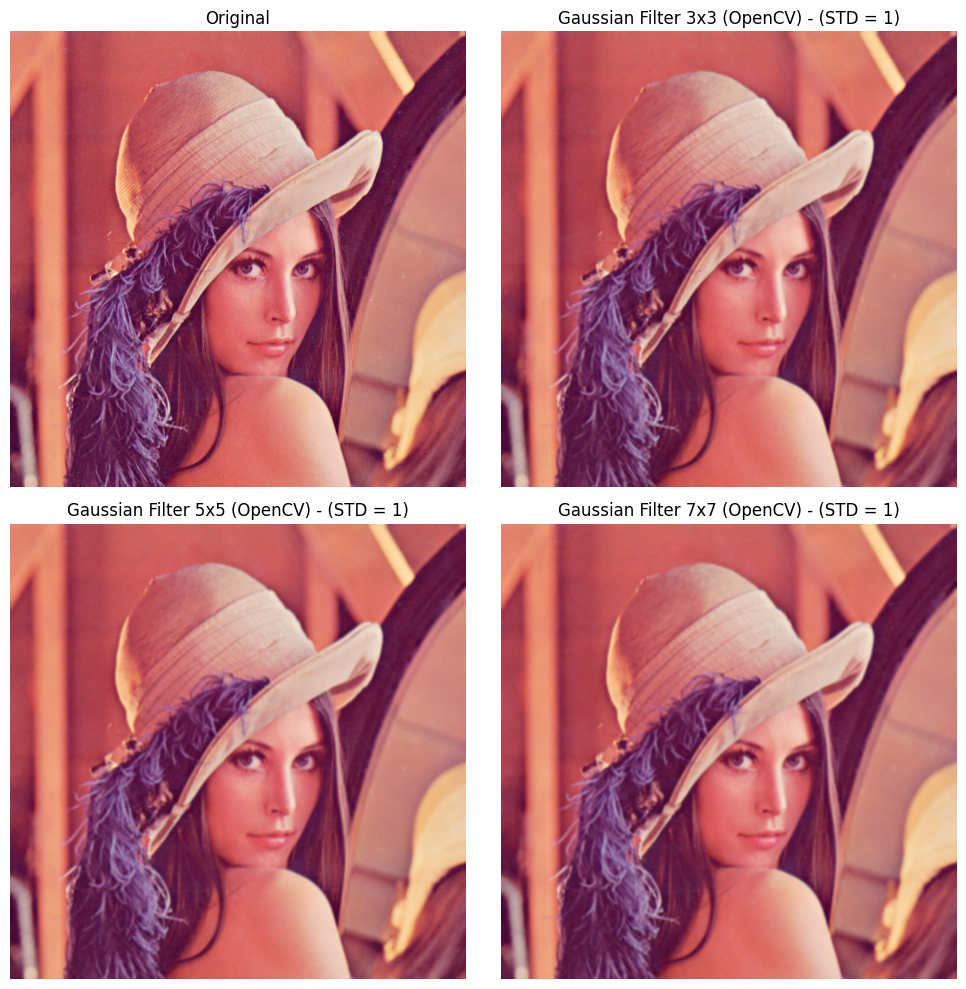

In [11]:
images = [image, cv2.filter2D(src=image, ddepth=-1, kernel=gauss_kernel(3, 1)), cv2.filter2D(src=image, ddepth=-1, kernel=gauss_kernel(5, 1)), cv2.filter2D(src=image, ddepth=-1, kernel=gauss_kernel(7, 1))]
titles = ["Original", "Gaussian Filter 3x3 (OpenCV) - (STD = 1)", "Gaussian Filter 5x5 (OpenCV) - (STD = 1)", "Gaussian Filter 7x7 (OpenCV) - (STD = 1)"] 

rows = 2
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

axes = axes.flatten()

for i, (ax, title) in enumerate(zip(axes, titles)):
    ax.imshow(images[i])
    ax.set_title(title, fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()